## Ön tanıtım

İnternetten bir film izlemek istediğinizi hayal edin. İnternetteki film puanlamalarına ne kadar güvenebilirsiniz ? *Özellikle* reytingi gösteren aynı şirket sinema bileti satarak da para kazanıyorsa. Sizce de derecelendirme konusunda insanları yanlış yönlendirmesi söz konusu olabilir mi ?

### Hedef:

**Amacınız aşağıdaki görevleri tamamlayarak *Fandango* websitesinin ratingler konusunda bir yanlış yapıp yapmadığını emin bir şekilde ispatlamak**

---
---

** Bu da bir sorulu analizdir. Aşağıda sorulan sorulara cevap vermeye ve çıktılara yakın bir çıktı elde etmeye çalışmanız gerekmektedir. **

---
----

## Part One: Datayı Anlamak

### The Data

Elimizde biri şüphelenilen *Fandango* sitsine ait yıldızlar ve film derecelendirmeleri içeriyor. Diğeri ise diğer film sitelerindeki film derecelendirmeleri için veriler içeren toplam 2 csv dosyası vardır.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` Bütün benzeri sitelerin açıklama kullanıcı puanlamaları bilgilerini ve özellikle 'Rotten Tomatoes(Çürük Elma) adlı bir filme ait başka sitelerdeki puanları içermektedir.'

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` Fandango sitesine ait 538 film içermektedir

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Analizinde işinize yarayacağını düşündüğünüz kütüphanaleri import edin:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Part Two: Fandango sitesini keşfetmeye çalışalım. Gerçek kullanıcı derecelendirmelerini ve site puanlarını yavaştan karşılaştıralım

Fandangonun filmleri puanlama ve derecelendirme konusunda taraflı davranıp davranmadığını analiz etmeye başlayalım !

**TASK: Aşağıdaki fandango_scrape.csv dosyasını çalıştırın**

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Fandango verilerini keşfetmeye çalışın. Aşağıdakine benzer çıktılar elde edin.**

# Uyarı ! çıktının tam üstünü kullanmayın. Bir üst hücre satırında çalışmalar yapın.

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [176]:
# Buraya kod yazmayın !

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [177]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe().T

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


In [178]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Verimizdeki filmlere ait votes ile rating arasındaki ilişkiyi keşfedelim. Derecelendirme ve oylar arasındaki ilişkiyi gösteren bir scatterplot grafiği oluşturun. Görsel stil eklemeler tamamen size kalmış**

In [6]:
?sns.scatterplot

Signature:
sns.scatterplot(
    *,
    x=None,
    y=None,
    hue=None,
    style=None,
    size=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    x_bins=None,
    y_bins=None,
    units=None,
    estimator=None,
    ci=95,
    n_boot=1000,
    alpha=None,
    x_jitter=None,
    y_jitter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue``

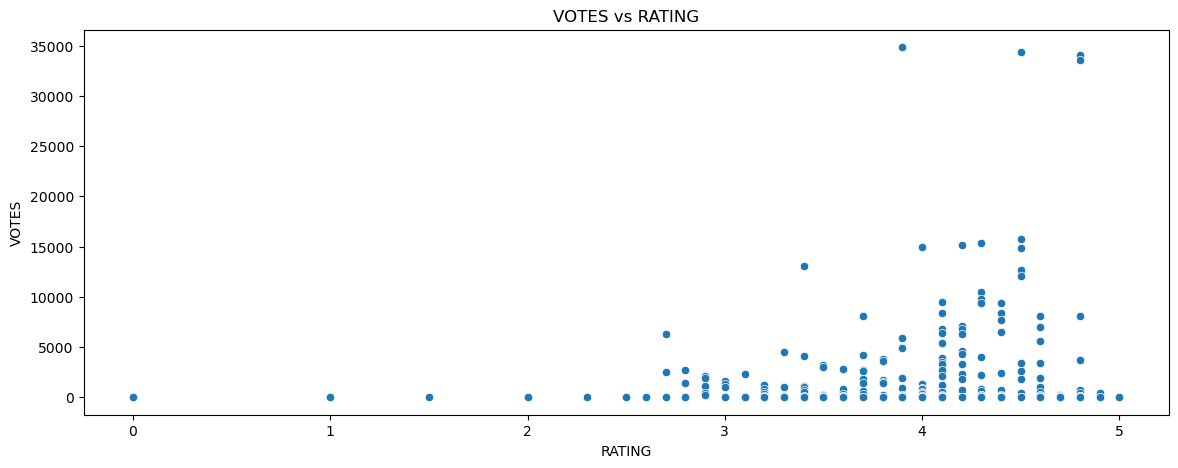

In [61]:
plt.rcParams["figure.figsize"] = (14, 5)
sns.scatterplot(
    data=fandango,
    x="RATING",
    y="VOTES",
)

plt.title("VOTES vs RATING")
plt.show()

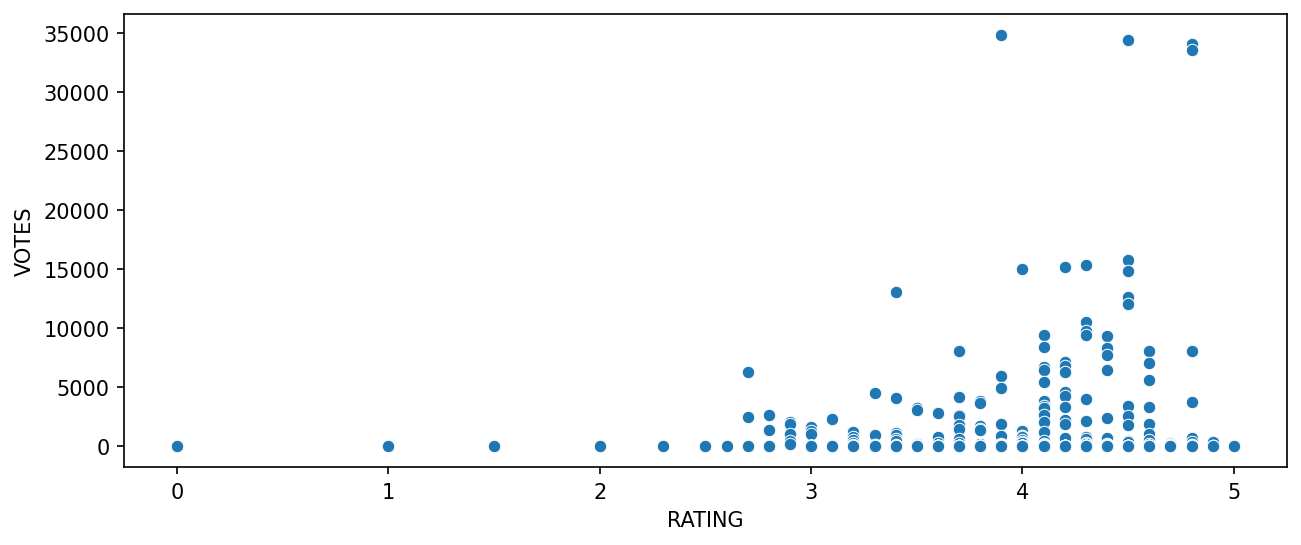

**TASK: Bütün columnlar arasındaki ilişkiye bakın**

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Bir şekilde 'Yıl' sütunu ekleyin**

In [8]:
fandango["YEAR"] = fandango["FILM"].str[ -5: -1]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


**TASK: Elimizdeki Fandango verilerinde yıl başına düşen film sayılarını bulun**

In [11]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Bir plot ile yıllara düşen film sayılarını görselleştirin:**

Text(0, 0.5, 'count')

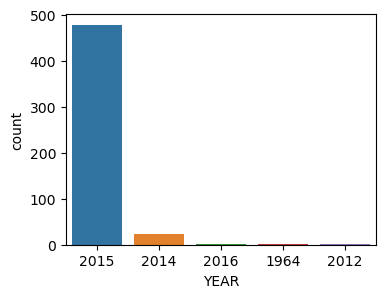

In [12]:
plt.rcParams["figure.figsize"] = (4, 3)
release_date = fandango["YEAR"].value_counts()
sns.barplot(x = release_date.index, y = release_date.values)
plt.xlabel("YEAR")
plt.ylabel("count")

<AxesSubplot:xlabel='YEAR', ylabel='count'>

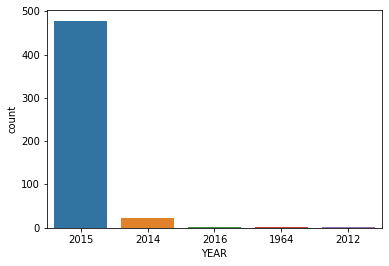

**TASK: En fazla oyu alan 10 film hangileridir?**

In [13]:
top_ten = fandango.sort_values('VOTES', ascending=False).head(10)
top_ten

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: Kaç tane film 0 vote'u aldı ?**

In [14]:
zeroVotes = (fandango['VOTES'] == 0).sum()
zeroVotes

69

69

**TASK: Sıfır oyu olan filmleri kaldırarak yalnızca incelenen filmlerin dataframe'ini oluşturun.**

In [15]:
fandango['VOTES'] = fandango['VOTES'].apply(lambda x: int(x))
del_zeroVotes = fandango.loc[fandango['VOTES']  != 0 ]
del_zeroVotes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**TASK: Bazı filmlerde usulsüzlük yapıldığı ve kullanıcılara gösterilen STARS değerlerinin gerçek RATING değerlerinden biraz daha fazla çıktığı düşünüyoruz. 'STARS_DIFF' adında yeni bir column ekleyerek STARS ile RATING arasındaki farkları bu column'da tutun.**

In [16]:
fandango["STARS_DIFF"] = fandango["STARS"] - fandango["RATING"]
fandango["STARS_DIFF"]
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,0.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: STARS_DIFF sütunundaki verilerin kaçar kez oluştuğunu count edin ve plotlayın**

In [56]:
fandango["STARS_DIFF"].value_counts()

0.0    176
0.2     82
0.3     72
0.4     44
0.1     40
0.5     37
0.1     26
0.4     26
1.0      1
Name: STARS_DIFF, dtype: int64

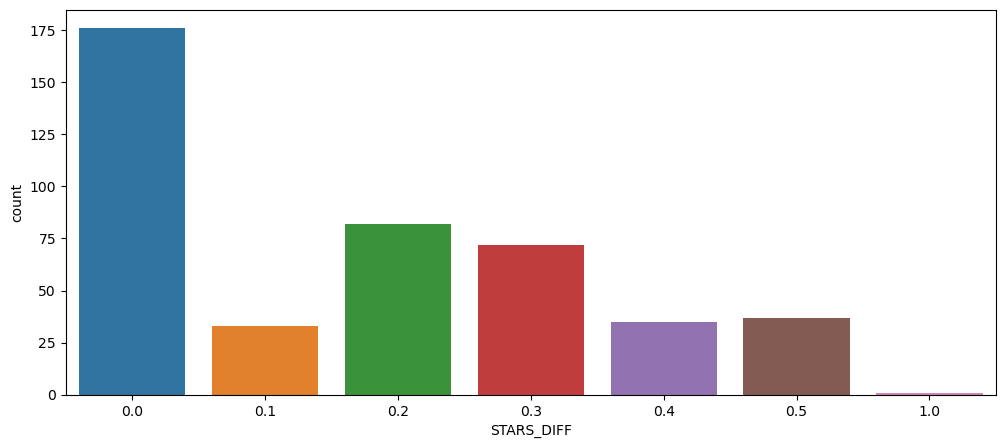

In [30]:
fig, ax = plt.subplots(figsize = (12, 5))
sayım = fandango["STARS_DIFF"].value_counts()
sayım.index = np.around(sayım.index, 1)
sns.barplot(x= sayım.index,
            y= sayım.values,
            ci = None) 

ax.set_xlabel("STARS_DIFF")
ax.set_ylabel("count")
plt.show()

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

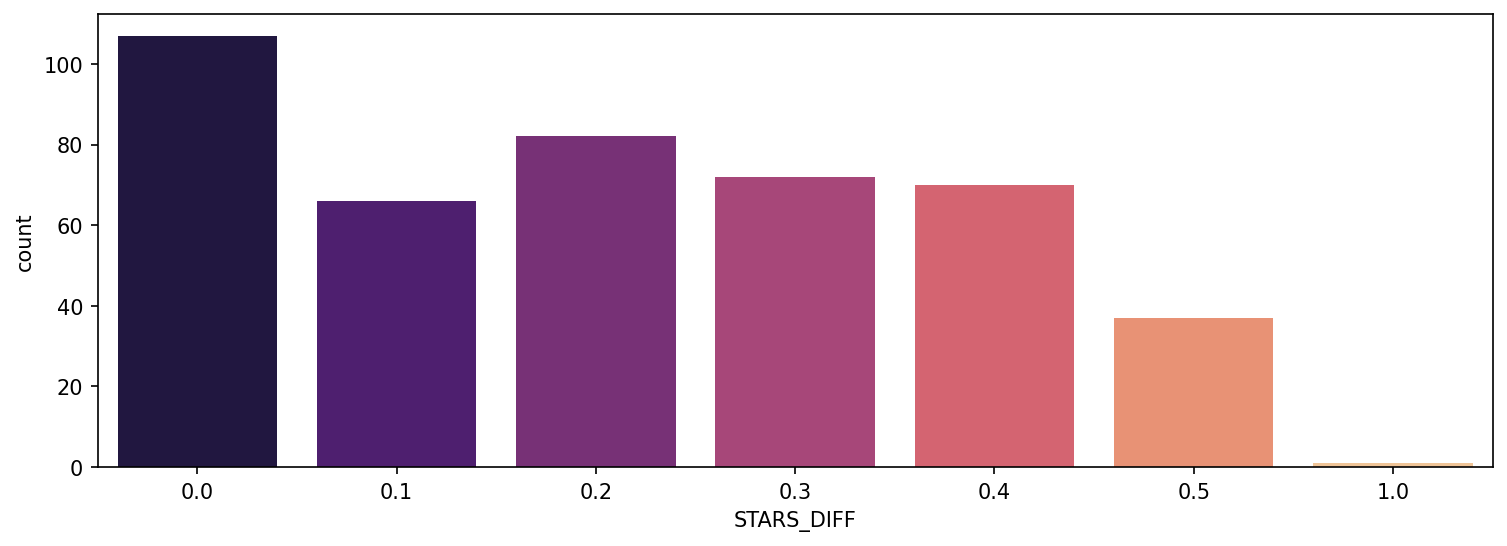

**TASK Üstteki plot'dan gördüğümüz üzere STARS_DIFF'i 1 olan film bile var. Bu çok yoğun usulsüzlük yapılan filmi getirin ve inceleyelim.**

In [19]:
selected_row = fandango[fandango['STARS_DIFF'] == 1.0 ] 
selected_row

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Fandango Puanlamalarını Başka Sitelerle Karşılaştıralım

**TASK: "all_sites_scores.csv" dosyasını okuyun**

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Bu csv dosyasını da keşfetmek için temel analiz başlangıcı kodlarını yazın.**

In [21]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Önce Rotten Tomatoes'i inceleyelim. RottenTomatoes adında gerçek yorumcuların derecelendirmeleri ve RottenTomatoes_User adında kullanıcıların derecelendirmelerini içeren bir sütun bulunuyor. Bu sütunları plot edelim.

**TASK: Aşağıdaki gibi bir scatterplot oluşturun.**

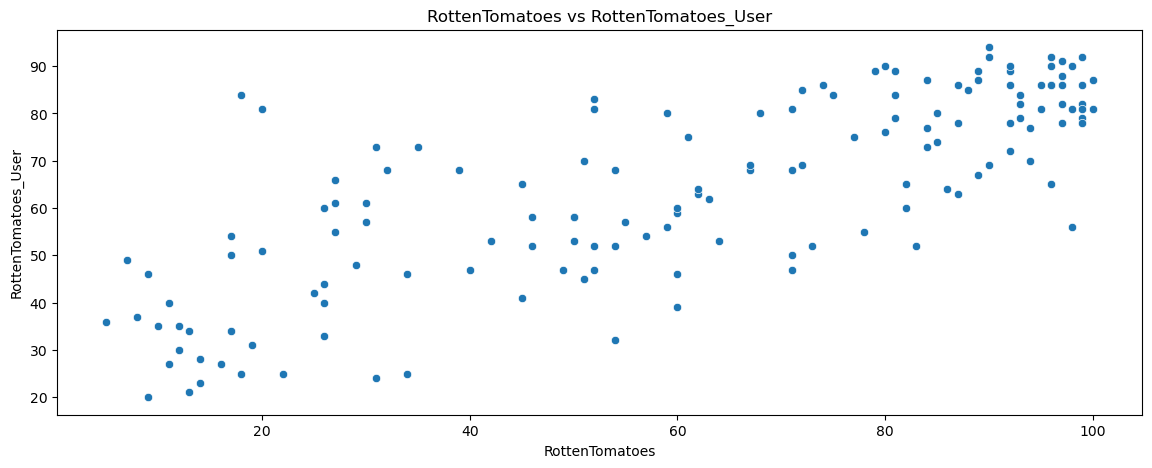

In [59]:
plt.rcParams["figure.figsize"] = (14, 5)
sns.scatterplot(
    data=all_sites,
    x="RottenTomatoes",
    y="RottenTomatoes_User",
)

plt.title("RottenTomatoes vs RottenTomatoes_User")
plt.show()

(0.0, 100.0)

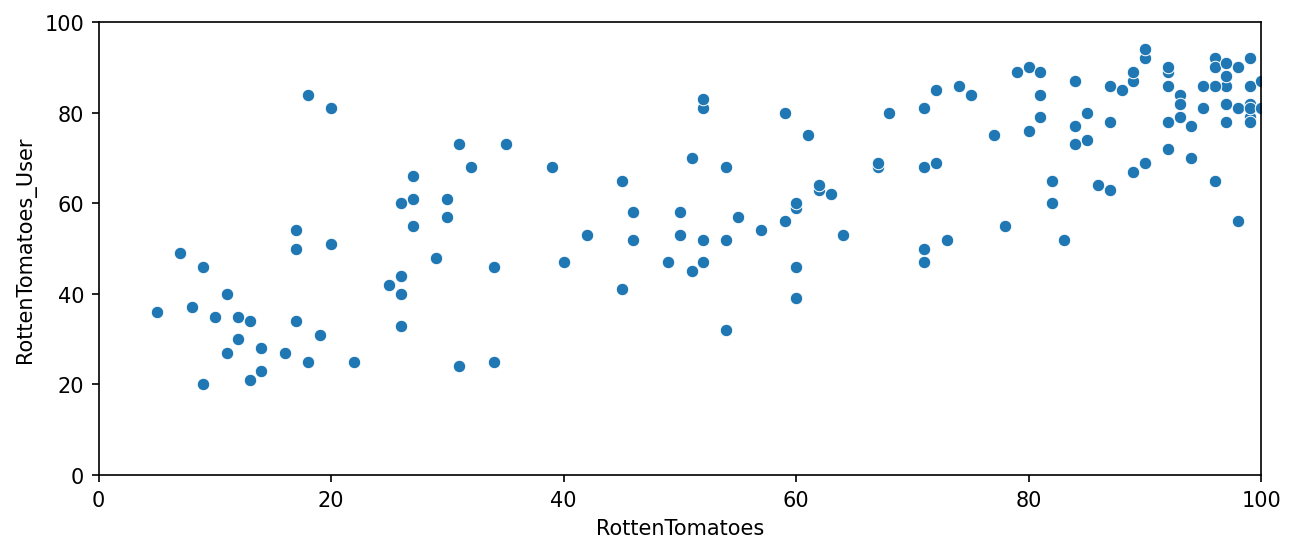

**TASK: Rotten DIFF adında bir column oluşturun ve bu column RottenTomatoes-RottenTomatoes_User bilgilerinden oluşsun.**

In [31]:
all_sites['RottenTomatoes_User'].count()

146

In [32]:
all_sites['Rotten_DIFF'] =all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_DIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_DIFF, Length: 146, dtype: int64

**TASK: RT Eleştirmen Puanı ile RT Kullanıcı Puanı arasındaki farkların dağılımını çizin. Bu dağılım grafiğinde negatif değerler olmalıdır. Bu dağıtımı görüntülemek için KDE veya Histogramları kullanabilirsiniz**

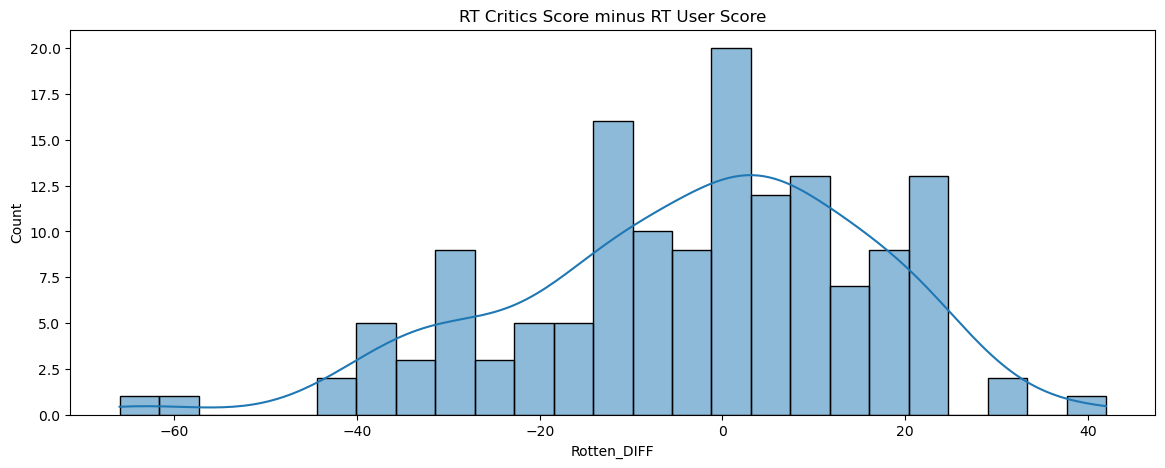

In [53]:
sns.histplot(data=all_sites, x='Rotten_DIFF', bins=25, kde=True)
plt.title('RT Critics Score minus RT User Score')
plt.show()

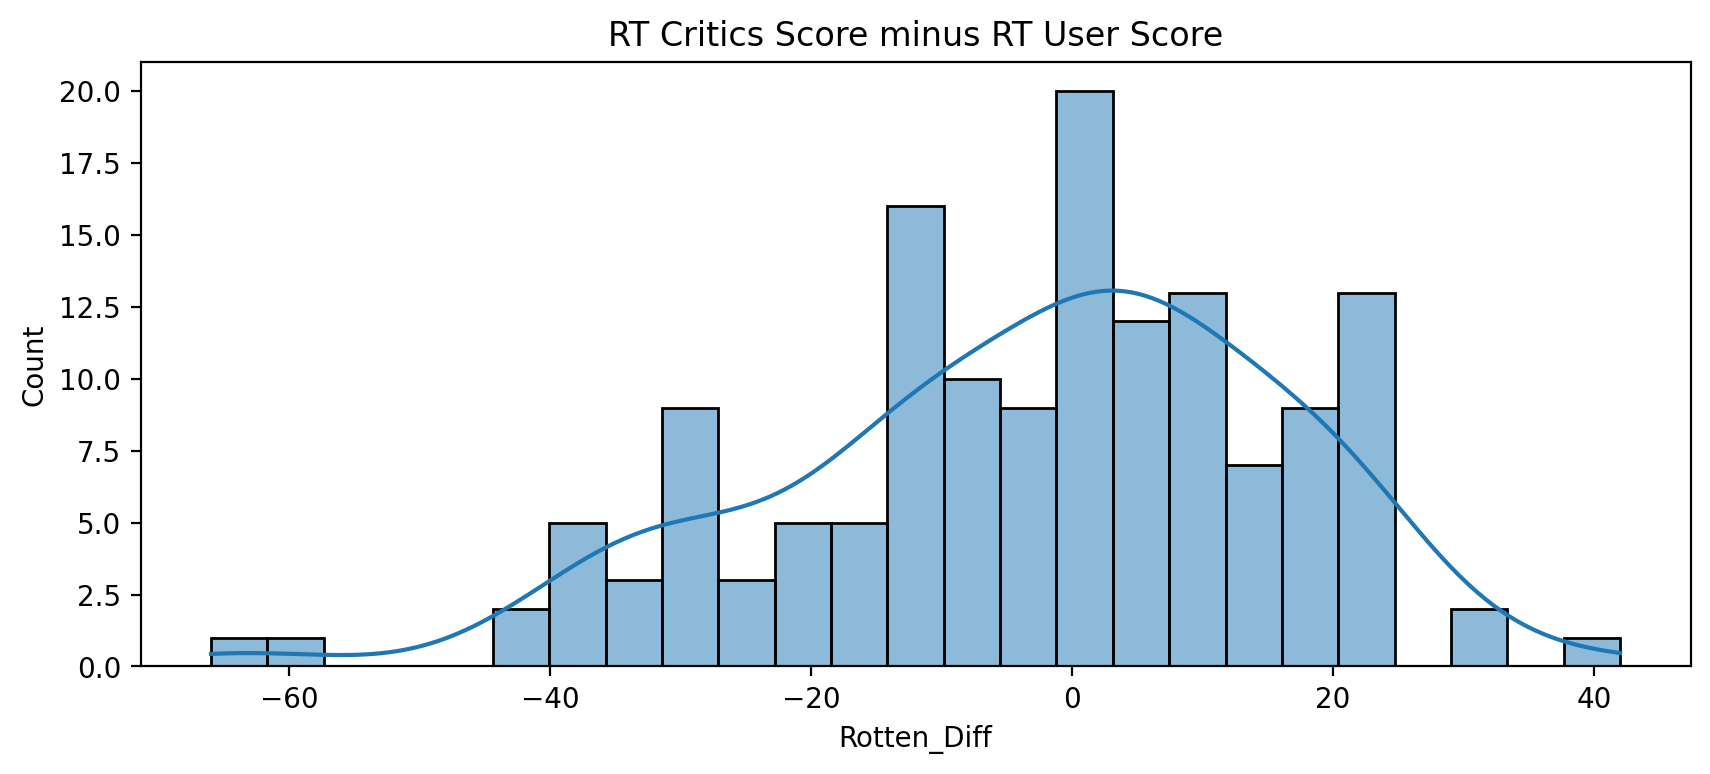

**Hadi Kullanıcı ile eleştirmen puanlamaları arasındaki farkın(Rotten_Diff) en yüksek ve en düşük olduğu filmlere bi bakalım.**

**TASK: Ortalama olarak kullanıcıların, eleştirmenlerden daha fazla sevdiği 5 filmi getirin.**

In [54]:
top_5_diff = all_sites.sort_values(by='Rotten_DIFF', ascending=True).head(5)
top_5_diff[['FILM', 'Rotten_DIFF']]

,FILM,Rotten_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Şimdi de tam tersi, kullanıcıların eleştirmenlerden bile daha çok sevmediği 5 filmi getirin**

In [62]:
top_5_diff = all_sites.sort_values(by='Rotten_DIFF', ascending=False).head(5)
top_5_diff[['FILM', 'Rotten_DIFF']]

,FILM,Rotten_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Burdan sonraki analizlerde sizi özgür bırakıyoruz. İstediğiniz her şeye bakabilir her türlü incelemeyi ve plot'u çizdirebilirsiniz. Ve en sonunda ulaşmanızı istediğimiz bir sonuç var. *Fandango* sitesi kullanıcıları film puanlamaları konusunda kayda değer ölçüde kandırıyor çünkü .... şeklinde bir karara varmanız ya da *Fandango* sitesi diğer sitelere benzer bir tutum sergiliyor ve herhangi bir yanlış yönlendirme yapmıyor çünkü .... şeklinde bir karara varmanız. 

Varacağınız bu kararı maddeler ve kanıtlar halinde notebook'unuzun en altında mantıklı bir şekilde delilleriyle açıklayın. Burada hangi karara varırsanız varın önemli olan ve bizim de EmKa Academy olarak dikkat edeceğimiz şey, ulaştığınız kararı düzgün bir şekilde açıklayabiliyor musunuz ? Asıl odaklandığımız nokta sonuçtan ziyade bu. O yüzden en altta maddeler halinde kararınızı açıklarken dikkatli davranın. 

* Fandango sitesi diğer sitelere benzer bir tutum sergiliyor ve herhangi bir yanlış yönlendirme yapmıyor. Çünkü diğer sitelerdeki gibi göreceli puanlamalara varılmış. Aşağıdaki örnekte diğer sitelerdeki kıyaslama örneğinde "Eleştirmen" ile "Kullanıcı" puanları arasındaki farka dikkat edersek film sitelerindeki oyların kişiye göre değiştiğini görebiliyoruz. Bu da demek oluyor ki "Fandango" sitesi de diğer siteler gibi birden fazla gruba hitab ediyor ve bu sonuçla puanlama ve raiting arasında değişkenlik ortaya çıkıyor. 

In [32]:
all_sites['Rotten_DIFF'] =all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_DIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_DIFF, Length: 146, dtype: int64

* Aşağıda "Fandango" sitesine ait Star ve Raiting değerleri arasındaki farkın net bir şekilde gözüktüğü şemamız bulunuyor ve ayrıca sayısal değerlerini de açıkca herkes görebilsin diye belirtmiş bulunmaktayım. Burda da yukarıda açıkladığım gibi usulsüzlük yapıldığını düşünmüyorum. Çünkü bazı troller her anket veya sitede olduğu gibi bizim sitemizde de "Raiting" ve "Star" analizimiz de çıkmıştır. Kısaca toparlayacak olursak "Fandango" sitesi insanlara izlenebilecek filmleri yeterli doğruluk düzeyinde önerebilir.

0.0    176
0.2     82
0.3     72
0.4     44
0.1     40
0.5     37
0.1     26
0.4     26
1.0      1
Name: STARS_DIFF, dtype: int64


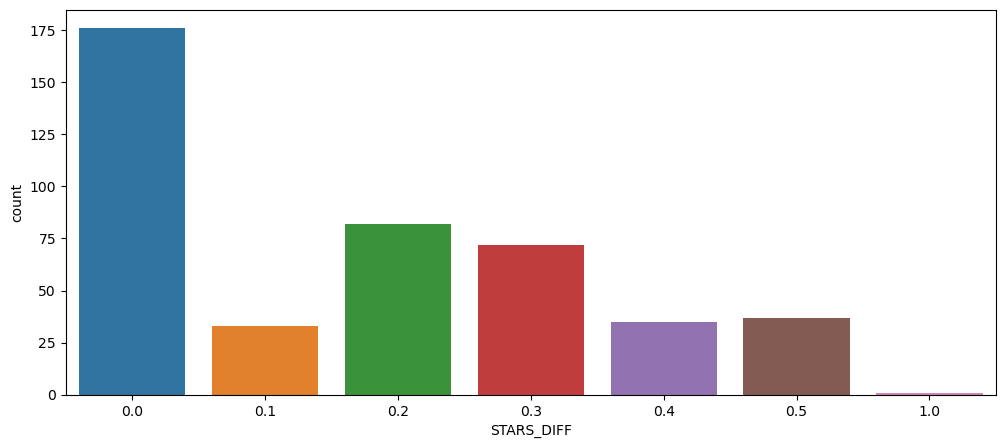

In [63]:
fig, ax = plt.subplots(figsize = (12, 5))
sayım = fandango["STARS_DIFF"].value_counts()
sayım.index = np.around(sayım.index, 1)
sns.barplot(x= sayım.index,
            y= sayım.values,
            ci = None) 

ax.set_xlabel("STARS_DIFF")
ax.set_ylabel("count")
print(sayım)
plt.show()

# BAŞARILAR

----